In [55]:
import calendar

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
d = pd.read_csv("pvwatts_hourly.csv", skiprows=31)

In [35]:
d

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,0.0,0.7,0.87,0.0,0.0,0.0,0.0
1,1,1,1,0,0,0.0,0.7,0.87,0.0,0.0,0.0,0.0
2,1,1,2,0,0,0.0,0.7,0.87,0.0,0.0,0.0,0.0
3,1,1,3,0,0,0.0,0.7,0.87,0.0,0.0,0.0,0.0
4,1,1,4,0,0,0.0,0.8,0.87,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,19,0,0,-1.0,0.5,0.87,0.0,-1.0,0.0,0.0
8756,12,31,20,0,0,0.0,0.6,0.87,0.0,0.0,0.0,0.0
8757,12,31,21,0,0,0.0,0.6,0.87,0.0,0.0,0.0,0.0
8758,12,31,22,0,0,0.0,0.6,0.87,0.0,0.0,0.0,0.0


### CDF of watt hours per day

<Axes: >

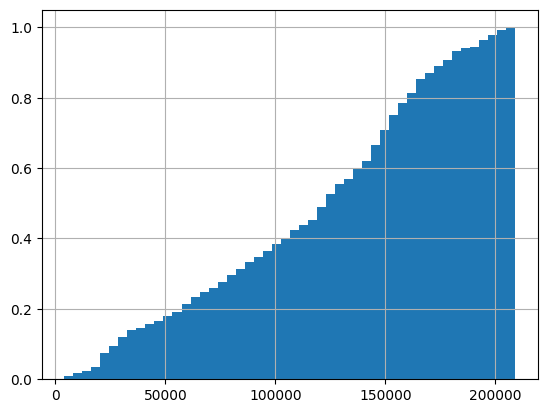

In [11]:
daily_energy = d.groupby(['Month','Day'])['AC System Output (W)'].sum()
daily_energy.hist(bins=50, cumulative=True, density=True)

CDF in table form:

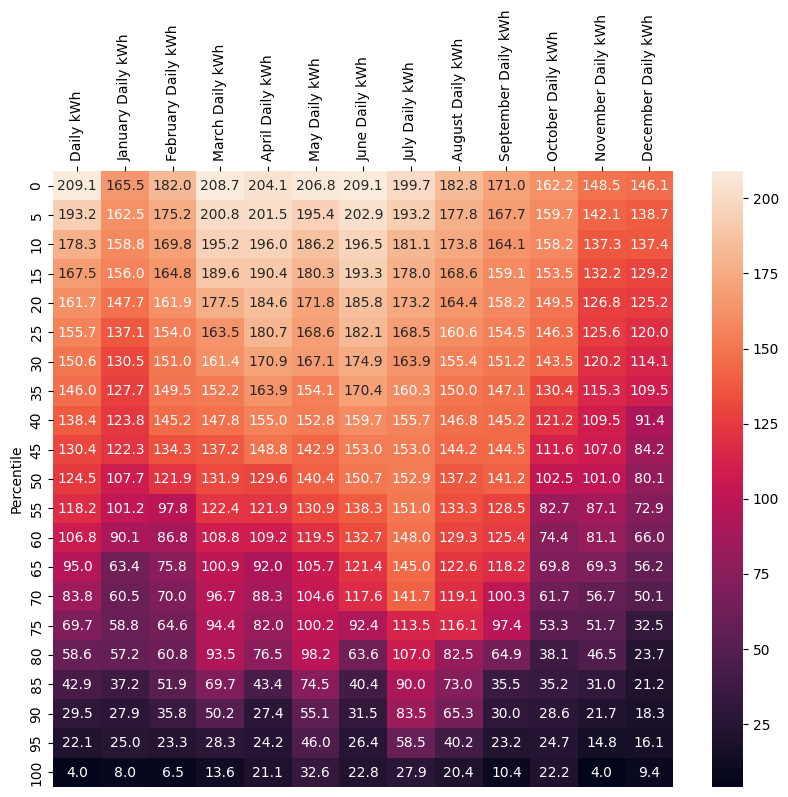

In [69]:
quantiles = np.linspace(0, 1, 21)
daily_percentiles = pd.DataFrame({
    'Percentile': (quantiles * 100).astype(int), 
    'Daily kWh': np.quantile(daily_energy.to_numpy()/1000, 1 - quantiles).round(1),
    **{ 
        f'{calendar.month_name[i]} Daily kWh':
            np.quantile(daily_energy[i].to_numpy()/1000, 1 - quantiles).round(1) for i in range(1,13)
    } 
}).set_index('Percentile')
plt.figure(figsize=(10,8))
ax = sns.heatmap(daily_percentiles, annot=True, fmt=".1f")
ax.tick_params(labeltop=True, top=True, labelbottom=False, bottom=False, labelrotation=90)

### Average daily output on a month-by-month basis

In [29]:
daily_energy.reset_index().groupby('Month')['AC System Output (W)'].mean().round()

Month
1      98710.0
2     109008.0
3     125920.0
4     124544.0
5     130071.0
6     132099.0
7     140543.0
8     127413.0
9     116475.0
10     96667.0
11     87285.0
12     78155.0
Name: AC System Output (W), dtype: float64

### 3-day averages

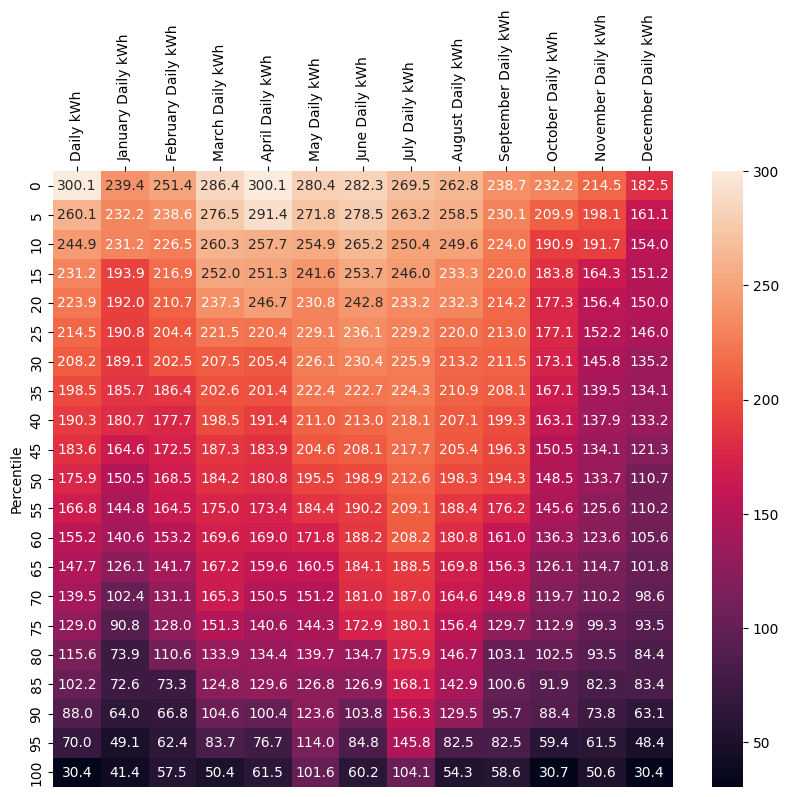

In [71]:
quantiles = np.linspace(0, 1, 21)
two_day_percentiles = pd.DataFrame({
    'Percentile': (quantiles * 100).astype(int), 
    'Daily kWh': np.quantile(np.convolve(daily_energy.to_numpy()/1000, [1,1,1])[1:-1]/2, 1 - quantiles).round(1),
    **{ 
        f'{calendar.month_name[i]} Daily kWh':
            np.quantile(np.convolve(daily_energy[i].to_numpy()/1000, [1,1,1])[1:-1]/2, 1 - quantiles).round(1) for i in range(1,13)
    } 
}).set_index('Percentile')
plt.figure(figsize=(10,8))
ax = sns.heatmap(two_day_percentiles, annot=True, fmt=".1f")
ax.tick_params(labeltop=True, top=True, labelbottom=False, bottom=False, labelrotation=90)

### Annual average

In [70]:
daily_energy.mean()

113934.82484383561